In [2]:
!pip install --upgrade pip

!pip install --upgrade plotly

     |████████████████████████████████| 1.6 MB 33.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 23.9 MB 2.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


TREEMAP

In [1]:
# Pacotes
import pandas as pd
import plotly.express as px
import numpy as np
import plotnine as p9

In [ ]:
# Numero de domicilios
dados = pd.read_csv('05_unidades_da_federacao.csv', 
                      header = 0)
dados

,reg,sigla,uf,total,Com segurança alimentar,Com insegurança alimentar,Com insegurança alimentar leve,Com insegurança alimentar moderada,Com insegurança alimentar grave
0,Norte,RO,Rondônia,571,364,207,149,38,20
1,Norte,AC,Acre,234,97,137,76,32,29
2,Norte,AM,Amazonas,1014,349,665,322,199,144
3,Norte,RR,Roraima,138,83,54,32,9,13
4,Norte,PA,Pará,2347,910,1437,800,379,258
5,Norte,AP,Amapá,209,85,124,62,40,22
6,Norte,TP,Tocantins,484,263,221,147,51,23
7,Nordeste,MA,Maranhão,1971,667,1304,695,366,243
8,Nordeste,PI,Piauí,1018,550,468,294,112,62
9,Nordeste,CE,Ceará,2830,1503,1326,786,365,175


In [ ]:
dados_melt = pd.melt(dados, 
            id_vars=['reg', 'sigla', 'uf'], 
            value_vars=['total', 'Com segurança alimentar', 'Com insegurança alimentar leve',  'Com insegurança alimentar moderada',  'Com insegurança alimentar grave'], 
            var_name='sit', 
            value_name='num_dom')
dados_melt

,reg,sigla,uf,sit,num_dom
0,Norte,RO,Rondônia,total,571
1,Norte,AC,Acre,total,234
2,Norte,AM,Amazonas,total,1014
3,Norte,RR,Roraima,total,138
4,Norte,PA,Pará,total,2347
...,...,...,...,...,...
130,Sul,RS,Rio Grande do Sul,Com insegurança alimentar grave,101
131,Centro-Oeste,MS,Mato Grosso do Sul,Com insegurança alimentar grave,41
132,Centro-Oeste,MT,Mato Grosso,Com insegurança alimentar grave,45
133,Centro-Oeste,GO,Goiás,Com insegurança alimentar grave,117


In [ ]:
fig = px.treemap(dados_melt, path=[px.Constant("br"), 'reg', 'uf', 'sit'], 
                 values='num_dom',
                 color='sit', 
                 hover_data=['sigla'],
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [124]:
# Percentual/ Porcentagem
perc = pd.read_csv('05_unidades_da_federacao_perc.csv', 
                   header = 0, sep = ",")
perc.head()

,reg,sigla,uf,Com segurança alimentar,Com insegurança alimentar,Com insegurança alimentar leve,Com insegurança alimentar moderada,Com insegurança alimentar grave
0,Centro-Oeste,DF,Distrito Federal,86.877349,13.122651,9.002332,2.138753,1.981565
1,Centro-Oeste,GO,Goiás,77.522779,22.477221,17.632909,2.674435,2.169877
2,Centro-Oeste,MS,Mato Grosso do Sul,69.151152,30.848848,23.218974,5.187471,2.442404
3,Centro-Oeste,MT,Mato Grosso,76.488968,23.511032,16.783896,4.295592,2.431545
4,Nordeste,AL,Alagoas,51.535977,48.464023,31.174497,11.899247,5.390279


In [125]:
# Renomeando colunas
perc = perc.rename({'Com insegurança alimentar leve':'Leve', 
                    'Com insegurança alimentar moderada':'Moderada', 
                    'Com insegurança alimentar grave':'Grave'}, axis = 'columns')

In [126]:
# Deixando os dados em formato longo
perc_melt = pd.melt(perc, 
            id_vars=['reg', 'sigla', 'uf'],
            value_vars=['Leve',  'Moderada',  'Grave'], 
            var_name='sit', 
            value_name='perc')
perc_melt

,reg,sigla,uf,sit,perc
0,Centro-Oeste,DF,Distrito Federal,Leve,9.002332
1,Centro-Oeste,GO,Goiás,Leve,17.632909
2,Centro-Oeste,MS,Mato Grosso do Sul,Leve,23.218974
3,Centro-Oeste,MT,Mato Grosso,Leve,16.783896
4,Nordeste,AL,Alagoas,Leve,31.174497
...,...,...,...,...,...
76,Sudeste,RJ,Rio de Janeiro,Grave,4.008118
77,Sudeste,SP,São Paulo,Grave,3.427290
78,Sul,PR,Paraná,Grave,3.418093
79,Sul,RS,Rio Grande do Sul,Grave,3.254796


In [127]:
# A variável 'sit' como categórica
sit_cat = pd.Categorical(
    list(perc_melt['sit']), categories = ['Leve',  'Moderada',  'Grave'], ordered = True
)

perc_melt['sit_cat'] = sit_cat
perc_melt['sigla']

0     DF
1     GO
2     MS
3     MT
4     AL
      ..
76    RJ
77    SP
78    PR
79    RS
80    SC
Name: sigla, Length: 81, dtype: object

In [134]:
# A variável 'sigla' como categórica
sigla_cat = pd.Categorical(
    list(perc_melt['sigla']), 
    categories = ['DF', 'GO', 'MS', 'MT',
                  'AL', 'BA', 'CE', 'MA', 'PE', 'PI', 'PB', 'RN', 'SE',
                  'AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO',
                  'ES', 'MG', 'RJ', 'SP'
                  'PR', 'RS', 'SC'], 
    ordered = True
)


perc_melt['sigla_cat'] = sigla_cat
perc_melt.query(' sigla == "AM" ')

,reg,sigla,uf,sit,perc,sit_cat,sigla_cat
14,Norte,AM,Amazonas,Leve,35.235359,Leve,AM
41,Norte,AM,Amazonas,Moderada,18.576123,Moderada,AM
68,Norte,AM,Amazonas,Grave,12.339581,Grave,AM


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


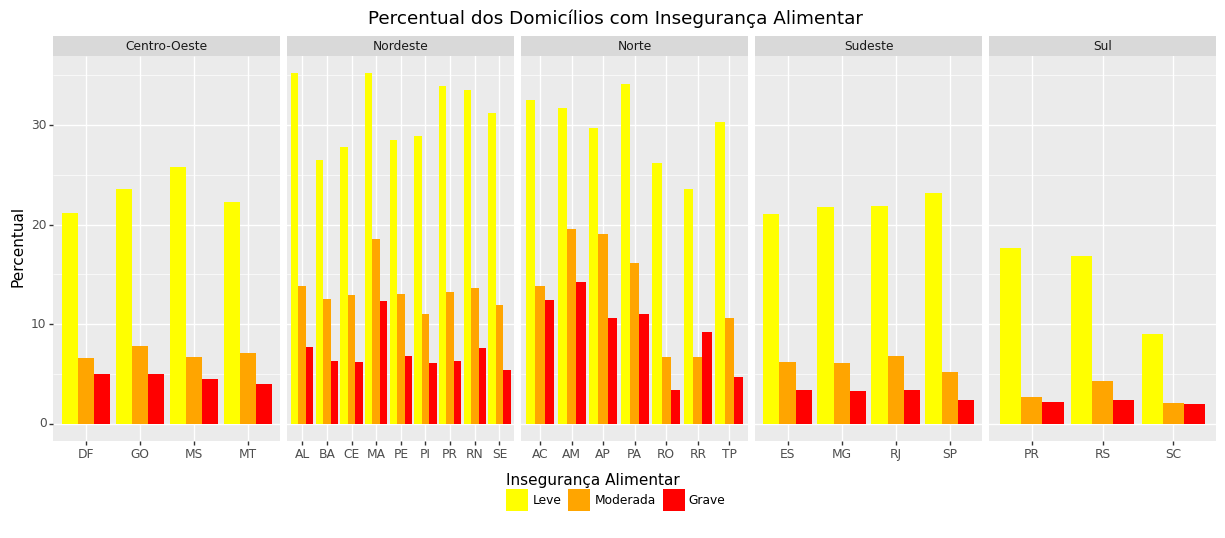

<ggplot: (8748120950925)>

In [52]:
# Gráfico Barras
color_dict = {'Grave': 'red',  
              'Moderada': 'orange', 
              'Leve': 'yellow'}

(
    p9.ggplot(perc_melt, 
              p9.aes(x = 'sigla', y = 'perc', fill = 'sit_cat')) 
    + p9.geom_bar(stat = 'identity', position = 'dodge')
    + p9.facet_wrap('~ reg', scales = 'free_x', nrow = 1)
    + p9.labs(y = 'Percentual', 
              x = '', 
              title = 'Percentual dos Domicílios com Insegurança Alimentar',
              caption = "Fonte: POF IBGE 2018",
              fill = "Insegurança Alimentar")
    #+ p9.guides(color = False)
    + p9.scale_color_manual(values = color_dict)
    + p9.scale_fill_manual(values = color_dict)
    + p9.theme(legend_position = "bottom",
               figure_size = (15, 5))
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


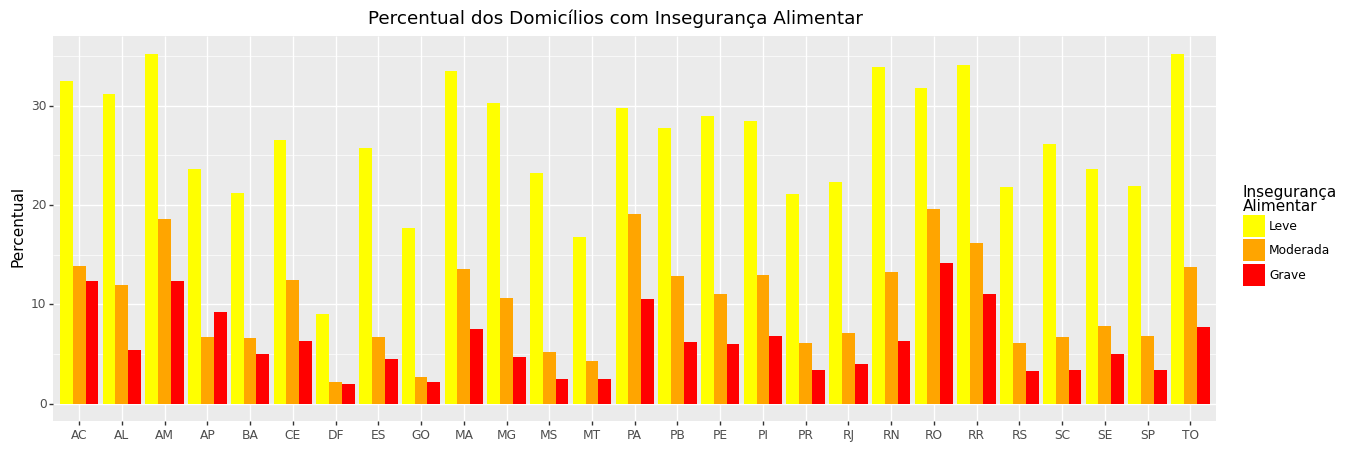

<ggplot: (8748122533489)>

In [133]:
# Gráfico Barras 2
color_dict = {'Grave': 'red',  
              'Moderada': 'orange', 
              'Leve': 'yellow'}

(
    p9.ggplot(perc_melt, 
              p9.aes(x = 'sigla', y = 'perc', fill = 'sit_cat')) 
    + p9.geom_bar(stat = 'identity', position = 'dodge')
    + p9.labs(y = 'Percentual', 
              x = '', 
              title = 'Percentual dos Domicílios com Insegurança Alimentar',
              caption = "Fonte: POF IBGE 2018",
              fill = "Insegurança\nAlimentar\n")
    + p9.scale_color_manual(values = color_dict)
    + p9.scale_fill_manual(values = color_dict)
    + p9.theme(legend_position = "right",
               #subplots_adjust={'bottom': 0.25, 'right': 0.85},
               figure_size = (15, 5))
    #+ p9.guides(fill = p9.guide_legend(title_position = "left"))
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


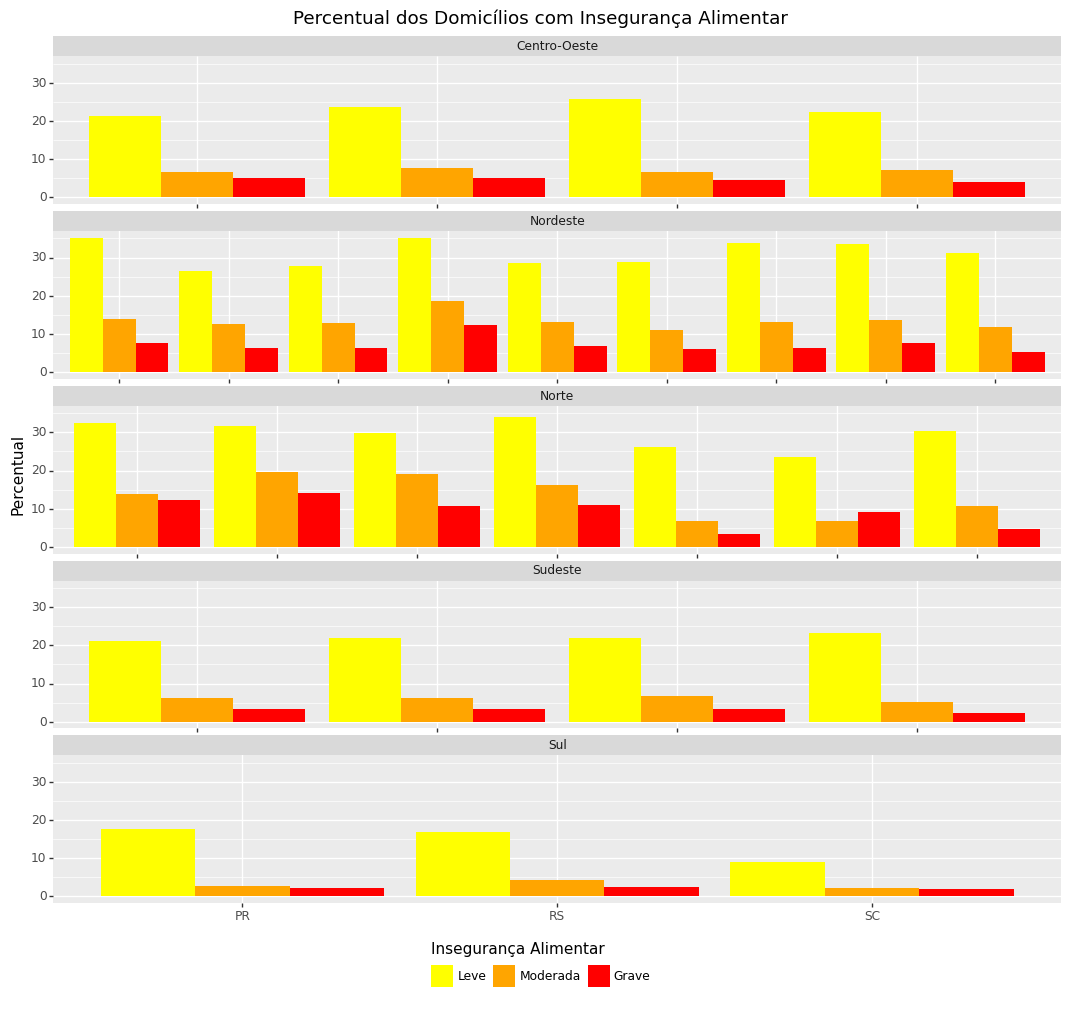

<ggplot: (8748121438485)>

In [75]:
# Gráfico Barras 2
color_dict = {'Grave': 'red',  
              'Moderada': 'orange', 
              'Leve': 'yellow'}

(
    p9.ggplot(perc_melt, 
              p9.aes(x = 'sigla', y = 'perc', fill = 'sit_cat')) 
    + p9.geom_bar(stat = 'identity', position = 'dodge')
    + p9.facet_wrap('~ reg', scales = 'free_x', nrow = 5)
    + p9.labs(y = 'Percentual', 
              x = '', 
              title = 'Percentual dos Domicílios com Insegurança Alimentar',
              caption = "Fonte: POF IBGE 2018",
              fill = "Insegurança Alimentar\n")
    #+ p9.guides(color = False)
    + p9.scale_color_manual(values = color_dict)
    + p9.scale_fill_manual(values = color_dict)
    + p9.theme(legend_position = "bottom",
               panel_spacing = 0.5,
               figure_size = (13, 11))
)